In [2]:
import mne
edf3 = mne.io.read_raw_edf('chb01_03.edf')
edf4 = mne.io.read_raw_edf('chb01_04.edf')
edf15 = mne.io.read_raw_edf('chb01_15.edf')
edf16 = mne.io.read_raw_edf('chb01_16.edf')
edf18 = mne.io.read_raw_edf('chb01_18.edf')
edf21 = mne.io.read_raw_edf('chb01_21.edf')
edf26 = mne.io.read_raw_edf('chb01_26.edf')

Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_15.edf...
EDF file detected


<ipython-input-2-dc94843f228d>:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf3 = mne.io.read_raw_edf('chb01_03.edf')
<ipython-input-2-dc94843f228d>:3: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf4 = mne.io.read_raw_edf('chb01_04.edf')


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_21.edf...
EDF file detected


<ipython-input-2-dc94843f228d>:4: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf15 = mne.io.read_raw_edf('chb01_15.edf')
<ipython-input-2-dc94843f228d>:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf16 = mne.io.read_raw_edf('chb01_16.edf')
<ipython-input-2-dc94843f228d>:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf18 = mne.io.read_raw_edf('chb01_18.edf')
<ipython-input-2-dc94843f228d>:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf21 = mne.io.read_raw_edf('chb01_21.edf')


Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\Dibio-hardpreform\chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-2-dc94843f228d>:8: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  edf26 = mne.io.read_raw_edf('chb01_26.edf')


In [5]:
import tensorflow as tf

print(tf.__version__)

from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Convolution2D,Input
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.utils import np_utils

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


# from tensorflow.keras import datasets, layers, models

2.1.0


In [157]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers

In [6]:
#Disabling the warnings permantently
import warnings
warnings.filterwarnings('ignore')

In [7]:
header = ','.join(edf3.ch_names)

df3 = np.savetxt('chb01_3.csv', edf3.get_data().T, delimiter=',', header=header)
df3 = pd.read_csv('chb01_3.csv')

df4 = np.savetxt('chb01_4.csv', edf4.get_data().T, delimiter=',', header=header)
df4 = pd.read_csv('chb01_4.csv')

df15 = np.savetxt('chb01_15.csv', edf15.get_data().T, delimiter=',', header=header)
df15 = pd.read_csv('chb01_15.csv')

df16 = np.savetxt('chb01_16.csv', edf16.get_data().T, delimiter=',', header=header)
df16 = pd.read_csv('chb01_16.csv')

df18 = np.savetxt('chb01_18.csv', edf18.get_data().T, delimiter=',', header=header)
df18 = pd.read_csv('chb01_18.csv')

df21 = np.savetxt('chb01_21.csv', edf21.get_data().T, delimiter=',', header=header)
df21 = pd.read_csv('chb01_21.csv')

df26 = np.savetxt('chb01_26.csv', edf26.get_data().T, delimiter=',', header=header)
df26 = pd.read_csv('chb01_26.csv')

In [8]:
df3 = pd.read_csv('chb01_3.csv')
df4 = pd.read_csv('chb01_4.csv')
df15 = pd.read_csv('chb01_15.csv')
df16 = pd.read_csv('chb01_16.csv')
df18 = pd.read_csv('chb01_18.csv')
df21 = pd.read_csv('chb01_21.csv')
df26 = pd.read_csv('chb01_26.csv')

In [9]:
df3 = df3.loc[2956*256:3036*256] #80s*
df4 = df4.loc[1440*256:1494*256] #27s*
df15 = df15.loc[1692*256:1772*256] #40s*
df16 = df16.loc[964*256:1066*256] #51s*
df18 = df18.loc[1630*256:1810*256] #90s*
df21 = df21.loc[234*256:420*256] #93s

df26 = df26.loc[1761*256:1963*256] #101s<--------------test

In [11]:
print((df3.shape),(df4.shape),(df15.shape),(df16.shape),(df18.shape),(df21.shape),(df26.shape))

(20481, 23) (13825, 23) (20481, 23) (26113, 23) (46081, 23) (47617, 23) (51713, 23)


In [12]:
L3nsz = np.zeros((8,1))
L3sz = np.ones((8,1))
L3_img = np.append(L3nsz,L3sz)

L4nsz = np.zeros((5,1))
L4sz = np.ones((5,1))
L4_img = np.append(L4nsz,L4sz)

# L15nsz = np.zeros((8,1))
# L15sz = np.ones((8,1))
# L15_img = np.append(L15nsz,L15sz)

L16nsz = np.zeros((10,1))
L16sz = np.ones((10,1))
L16_img = np.append(L16nsz,L16sz)

L18nsz = np.zeros((18,1))
L18sz = np.ones((18,1))
L18_img = np.append(L18nsz,L18sz)

L21nsz = np.zeros((18,1))
L21sz = np.ones((19,1))
L21_img = np.append(L21nsz,L21sz)

L26nsz = np.zeros((20,1))
L26sz = np.ones((20,1))
L26_img_test = np.append(L26nsz,L26sz)

In [13]:
Labels_img = np.concatenate((L3_img,L4_img,L16_img,L18_img,L21_img))
Labels_test = L26_img_test
print(len(Labels_img),len(L26_img_test))

119 40


In [14]:
Labels_ingint8 = Labels_img.astype(np.uint8)
Labels_testint8 = Labels_test.astype(np.uint8)

In [130]:
Labels_ingint8.shape

(119,)

In [ ]:
#------------------------ Test whit One Hot encoding

In [136]:
label_train = pd.get_dummies(Labels_ingint8, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
label_test = pd.get_dummies(Labels_testint8, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)

In [137]:
label_test.shape

(40, 2)

In [183]:
label_test

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,1,0
9,1,0


In [184]:
nclases = 2
label_train_categorical = np_utils.to_categorical(Labels_ingint8,nclases)
label_test_categorical = np_utils.to_categorical(Labels_testint8,nclases)

In [185]:
label_test_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
#------------------------ 

In [15]:
df3_array = pd.DataFrame(df3).to_numpy()
df4_array = pd.DataFrame(df4).to_numpy()
df15_array = pd.DataFrame(df15).to_numpy()
df16_array = pd.DataFrame(df16).to_numpy()
df18_array = pd.DataFrame(df18).to_numpy()
df21_array = pd.DataFrame(df21).to_numpy()
df26_array = pd.DataFrame(df26).to_numpy()

In [16]:
def vectorized_stride(array, clearing_time_index, max_time, sub_window_size,
                         stride_size):
    start = clearing_time_index + 1 - sub_window_size + 1
    
    sub_windows = (
        start + 
        np.expand_dims(np.arange(sub_window_size), 0) +
        # Create a rightmost vector as [0, V, 2V, ...].
        np.expand_dims(np.arange(max_time + 1, step=stride_size), 0).T
    )
    
    return array[sub_windows]

In [17]:
print((df3_array.shape),(df4_array.shape),(df15_array.shape),(df16_array.shape),(df18_array.shape),(df21_array.shape),(df26_array.shape))

(20481, 23) (13825, 23) (20481, 23) (26113, 23) (46081, 23) (47617, 23) (51713, 23)


In [18]:
r3 = len(df3_array)-(len(df3_array)%1279)-1
r4 = len(df4_array)-(len(df4_array)%1279)-1
# r15 = len(df15_array)-(len(df15_array)%1279)-1
r16 = len(df16_array)-(len(df16_array)%1279)-1
r18 = len(df18_array)-(len(df18_array)%1279)-1
r21 = len(df21_array)-(len(df21_array)%1279)-1
r26 = len(df26_array)-(len(df26_array)%1279)-1

In [19]:
df3_w = vectorized_stride(df3_array,1279,r3,1279,1279)
df4_w = vectorized_stride(df4_array,1279,r4,1279,1279)
# df15_w = vectorized_stride(df15_array,1279,r15,1279,1279)
df16_w = vectorized_stride(df16_array,1279,r16,1279,1279)
df18_w = vectorized_stride(df18_array,1279,r18,1279,1279)
df21_w = vectorized_stride(df21_array,1279,47617-295,1279,1279)
df26_w = vectorized_stride(df26_array,1279,r26,1279,1279)

In [20]:
print(df3_w.shape,df4_w.shape, df16_w.shape, df18_w.shape, df21_w.shape, df26_w.shape)

(16, 1279, 23) (10, 1279, 23) (20, 1279, 23) (36, 1279, 23) (37, 1279, 23) (40, 1279, 23)


In [21]:
df3_arr3d = np.array(df3_w)
df4_arr3d = np.array(df4_w)
# df15_arr3d = np.array(df15_w)
df16_arr3d = np.array(df16_w)
df18_arr3d = np.array(df18_w)
df21_arr3d = np.array(df21_w)
df26_arr3d = np.array(df26_w)

In [22]:
tensorp1 = np.vstack((df3_arr3d,df4_arr3d,df16_arr3d,df18_arr3d,df21_arr3d))
Test = (df26_arr3d)

In [23]:
print((Labels_ingint8.shape),(Labels_ingint8.ndim),(Labels_ingint8.dtype))
print((Labels_testint8.shape),(Labels_testint8.ndim),(Labels_testint8.dtype))

(119,) 1 uint8
(40,) 1 uint8


In [ ]:
#-------------------------Tain y test sin OneHot Encoding ni normalizacion

In [56]:
(x_train, y_train), (x_test, y_test) = ((tensorp1,Labels_ingint8),(Test,Labels_testint8))

In [27]:
print(x_train.shape)
print(x_test.shape)

(119, 1279, 23)
(40, 1279, 23)


In [ ]:
#-------------------------Tain y test sin OneHot Encoding ni normalizacion

In [ ]:
#............................train test con OneHot Encoding sin normalizacion

In [138]:
(x_train, y_train_oh), (x_test, y_test_oh) = ((tensorp1,label_train),(Test,label_test))

In [53]:
#------------------------------------------------normalizar

In [139]:
x_train[1].shape

from sklearn.preprocessing import normalize

test_n =normalize(x_train[1],axis=1, norm='l1')

plt.figure(figsize=(18,8))
plt.plot(x_train[1])

plt.figure(figsize=(18,8))
plt.plot(test_n)

plt.figure(figsize=(18,8))
plt.plot(test_n1)

row_sums = x_train[1].sum(axis=1)

plt.plot(row_sums)

test_n1 = x_train[1] / row_sums[:, np.newaxis]

test_n1

(1279, 23)

In [53]:
#------------------------------------------------normalizar----mnnn leeer mas

In [140]:
x_train = x_train.reshape(119, 1279, 23,1)
x_test = x_test.reshape(40, 1279, 23,1)

In [141]:
print(x_train.shape)
print(x_test.shape)

(119, 1279, 23, 1)
(40, 1279, 23, 1)


In [144]:
#----------------------------------------------

In [48]:
#limpiamos todo en caso de realizar un nuevo entrenamiento
K.clear_session()

###---------------------------------------------------------------------### 

In [28]:
# profundizar en el analicis de distribucion de los casos
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [97]:
filtrosConv1 = 32
filtrosConv2 = 32
filtrosConv3 = 32
filtrosConv4 = 32
tamaño_filtroConv1 = (3, 2)
tamaño_filtroConv2 = (3, 2)
tamaño_filtroConv3 = (3, 2)
tamaño_filtroConv4 = (3, 2)
tamaño_pool = (2, 2)

In [153]:
model = Sequential()

model.add(layers.Conv2D(filtrosConv1, tamaño_filtroConv1, padding='same', activation='relu', input_shape=(1279, 23, 1)))
model.add(layers.MaxPooling2D(tamaño_pool))

model.add(layers.Conv2D(filtrosConv2, tamaño_filtroConv2, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(tamaño_pool))

model.add(layers.Conv2D(filtrosConv3, tamaño_filtroConv3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D(tamaño_pool))

model.add(layers.Conv2D(filtrosConv4, tamaño_filtroConv4, padding='same', activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.5))# <--- apaga el 50 de las neuronas para evitar overfiting
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50 , activation='relu'))
model.add(layers.Dense(20 , activation='relu'))
model.add(layers.Dense(2, activation ='softmax'))
#model.add(layer.Dense(((Clases))), activation='softmax')# <--- es necesario agrupar en 2 clses de forma one hot

#model.summary()

In [179]:
epocas = 20
# longitud, altura = 1279,23
batch_size = 2 # numero de imagenes procesadas en cada paso ººpero no funcionaºº
# clases = 2 # seizure o no seizure
lr = 0.0005 # el learning rate que debe ser un numero pequeño

In [180]:
model.compile(optimizer=optimizers.Adam(lr=lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train_oh, epochs= epocas , batch_size = batch_size,
                    validation_data=(x_test, y_test_oh))

Train on 119 samples, validate on 40 samples
Epoch 1/20
119/119 [==============================] - 14s 120ms/sample - loss: 0.6944 - accuracy: 0.3950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
119/119 [==============================] - 13s 107ms/sample - loss: 0.6934 - accuracy: 0.4538 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/20
119/119 [==============================] - 13s 106ms/sample - loss: 0.6940 - accuracy: 0.5126 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/20
119/119 [==============================] - 13s 106ms/sample - loss: 0.6937 - accuracy: 0.4454 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/20
119/119 [==============================] - 13s 106ms/sample - loss: 0.6937 - accuracy: 0.4370 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/20
119/119 [==============================] - 13s 106ms/sample - loss: 0.6934 - accuracy: 0.5126 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/20
119/119 [==============================] - 13s 107ms/sample - 

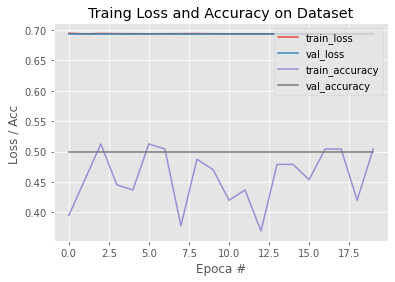

In [181]:
N = epocas
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0,N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), history1.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0,N), history1.history["val_accuracy"], label="val_accuracy")
plt.title("Traing Loss and Accuracy on Dataset")
plt.xlabel('Epoca #')
plt.ylabel('Loss / Acc ')
plt.legend(loc="upper right")
plt.savefig("CNN1_loss_Acc")

In [182]:
model.save('CNN1_sz.h5')